# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

df = pd.read_excel(r'C:\Users\gunal\Desktop\DSE\jupyt_notebook\Classification\Miniproject\GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [19]:
print('data dimensions: ',df.shape)
print('missing values: ',df.isnull().sum())

data dimensions:  (1000, 3)
missing values:  Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64


# 3. Plot Histogram for column 'CreditAmount'

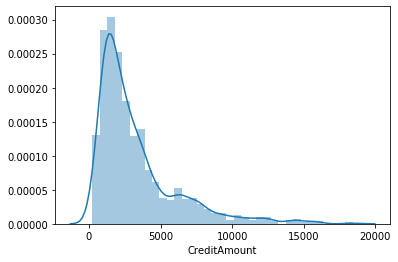

In [4]:
sns.distplot(df['CreditAmount'])

# 3b. Create creditability dataframe

In [5]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [6]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

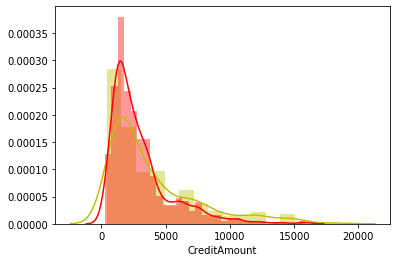

In [13]:
df1 = df[df['Creditability']==0]
df2 = df[df['Creditability']==1]


sns.distplot(df1['CreditAmount'],color='y')
sns.distplot(df2['CreditAmount'],color='r')

# 6. Prepare input data for the model

In [14]:
X=df.drop('Creditability',1)
y=df['Creditability']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# 7. Fit logistic regression model

In [15]:
logistic_model = LogisticRegression()
model = logistic_model.fit(X_train,y_train)

# 8. Test accuracy calculation

In [16]:
print('train score: ',model.score(X_train,y_train))
print('test score: ',model.score(X_test,y_test))

train score:  0.70625
test score:  0.715


# 9. Build a confusion matrix

In [17]:
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
matrix

array([[  7,  49],
       [  8, 136]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

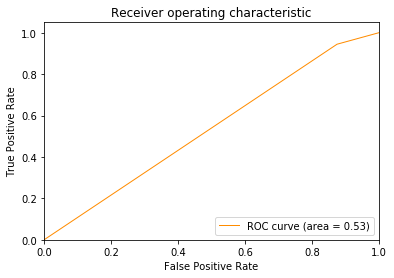

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()